# Cluster Ansatz by Yordanov

## Source of the circuit

PHYSICAL REVIEW A 102, 062612 (2020)

Efficient quantum circuits for quantum computational chemistry

Yordan S. Yordanov, David R. M. Arvidsson-Shukur, and Crispin H. W. Barnes


## Comments

1. Comparing to stamdard clusrter ansatz, here we use 2 staircases per one excitation, instead of 16 for standard ansatz

2. Yordanov version of the cluster ansatz has shorter circuit depth (while still huge one) comparing to "classical" cluster ansatz. In particular, for 4 nodes (8 qubits) there is 5000 cx gates in the ansatz, which is 3 times smaller than for "classical" one. 10 qubits: 15k vs 55k, 12 qubits: 40k vs 150k.

3. IBM most advanced Heron Qc is able to perform about 5k two-qubits gates.

In [1]:
import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

import numpy as np

In [2]:
PI = np.pi

## Auxiliary circuit to perform fermionic single particle transition
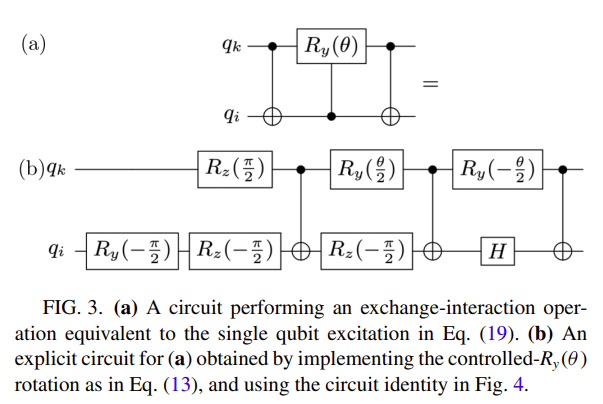

In [3]:
def ry_c(theta, i, k, qc):
    '''
    this is auxiliary function for single fermionic excitation

    Parameters:
    theta, float - rotation angle, defines how much of state i is transformed to k
    i,k, int - states between which transoition happens
    qc, QuantumCircuit - quantum circuit to which the ry_c set of gates will be added
    '''
    qc.cx(k,i)
    gate = qiskit.circuit.library.RZGate(PI / 2)
    qc.append(gate, [k])
    gate = qiskit.circuit.library.RYGate(-PI / 2)
    qc.append(gate, [i])
    gate = qiskit.circuit.library.RZGate(-PI / 2)
    qc.append(gate, [i])
    qc.cx(k,i)
    gate = qiskit.circuit.library.RYGate(theta / 2)
    qc.append(gate, [k])
    gate = qiskit.circuit.library.RZGate(-PI / 2)
    qc.append(gate, [i])
    qc.cx(k,i)
    gate = qiskit.circuit.library.RYGate(-theta / 2)
    qc.append(gate, [k])
    qc.h(i)
    #qc.cx(k,i)

    return qc

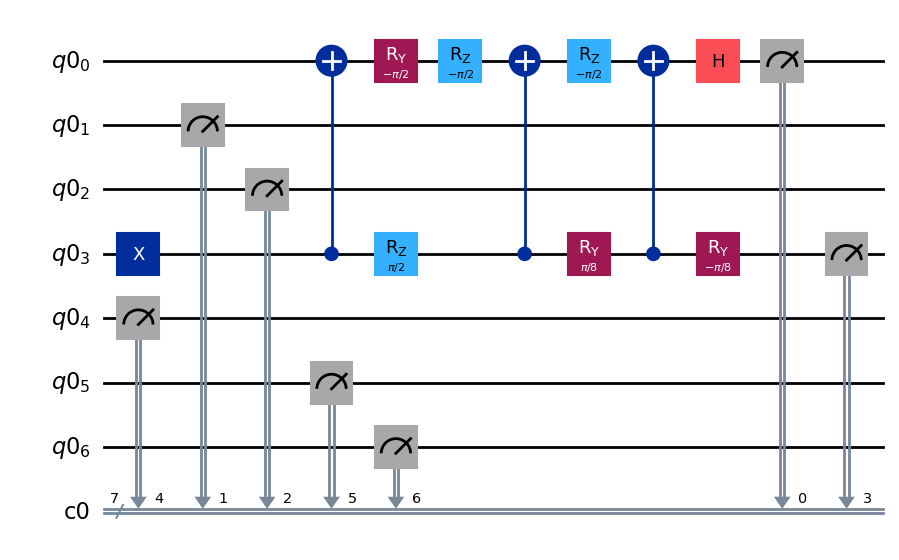

In [4]:
n_qubits = 7

q_reg = Q_R(n_qubits)
c_reg = C_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg,c_reg)

qc.x(3)

qc = ry_c(PI/4, 0, 3, qc)
for i in range(n_qubits):
    qc.measure(i,i)

qc.draw('mpl')

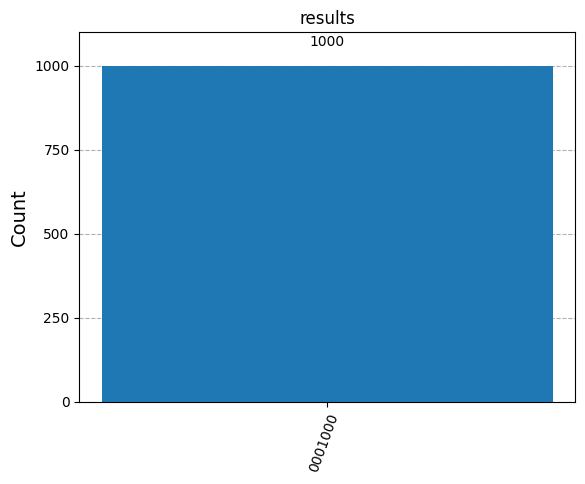

In [5]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = 1000).result()
counts= result.get_counts(qc_tr)


plot_histogram(counts, title = 'results')

## Auxiliary function for performing double fermionic exciattions

It perfroms double qubit excitation.

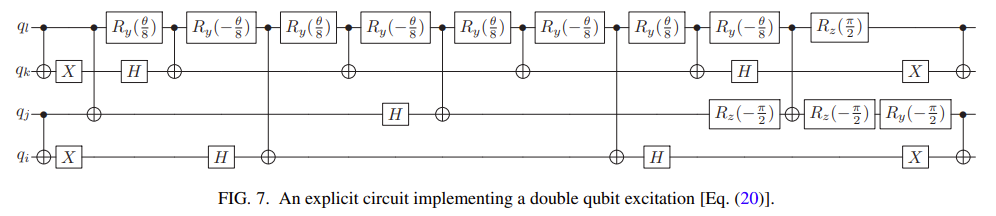

In [6]:
def ry_double(theta, i, j, k, l, qc):
    '''
    this is auxiliary function for double fermionic excitation

    Parameters:
    theta, float - rotation angle, defines how much of state i,j are transformed to k,l
    i,j,k,l int - states between which transoition happens
    qc, QuantumCircuit - quantum circuit to which the ry_c set of gates will be added
    '''
    qc.cx(l, k)
    qc.cx(j, i)
    qc.x(k)
    qc.x(i)
    qc.cx(l, j)
    gate = qiskit.circuit.library.RYGate(theta / 8)
    qc.append(gate, [l])
    qc.h(k)
    qc.cx(l, k)
    gate = qiskit.circuit.library.RYGate(-theta / 8)
    qc.append(gate, [l])
    qc.h(i)
    qc.cx(l, i)
    gate = qiskit.circuit.library.RYGate(theta / 8)
    qc.append(gate, [l])
    qc.cx(l, k)
    gate = qiskit.circuit.library.RYGate(-theta / 8)
    qc.append(gate, [l])
    qc.h(j)
    qc.cx(l, j)
    gate = qiskit.circuit.library.RYGate(theta / 8)
    qc.append(gate, [l])
    qc.cx(l, k)
    gate = qiskit.circuit.library.RYGate(-theta / 8)
    qc.append(gate, [l])
    qc.cx(l, i)
    gate = qiskit.circuit.library.RYGate(theta / 8)
    qc.append(gate, [l])
    qc.h(i)
    qc.cx(l, k)
    gate = qiskit.circuit.library.RYGate(-theta / 8)
    qc.append(gate, [l])
    qc.h(k)
    gate = qiskit.circuit.library.RZGate(-PI / 2)
    qc.append(gate, [j])
    qc.cx(l, j)
    gate = qiskit.circuit.library.RZGate(PI / 2)
    qc.append(gate, [l])
    gate = qiskit.circuit.library.RZGate(-PI / 2)
    qc.append(gate, [j])
    qc.x(k)
    gate = qiskit.circuit.library.RYGate(-PI / 2)
    qc.append(gate, [j])
    qc.x(i)
    qc.cx(l, k)
    qc.cx(j, i)
    
    return qc

In [31]:
def ry_double_1(theta, i, j, k, l, qc):
    '''
    this is auxiliary function for double fermionic excitation

    Parameters:
    theta, float - rotation angle, defines how much of state i,j are transformed to k,l
    i,j,k,l int - states between which transoition happens
    qc, QuantumCircuit - quantum circuit to which the ry_c set of gates will be added
    '''
    #qc.cx(l, k)
    #qc.cx(j, i)
    qc.x(k)
    qc.x(i)
    #qc.cx(l, j)
    gate = qiskit.circuit.library.RYGate(theta / 8)
    qc.append(gate, [l])
    qc.h(k)
    qc.cx(l, k)
    gate = qiskit.circuit.library.RYGate(-theta / 8)
    qc.append(gate, [l])
    qc.h(i)
    qc.cx(l, i)
    gate = qiskit.circuit.library.RYGate(theta / 8)
    qc.append(gate, [l])
    qc.cx(l, k)
    gate = qiskit.circuit.library.RYGate(-theta / 8)
    qc.append(gate, [l])
    qc.h(j)
    qc.cx(l, j)
    gate = qiskit.circuit.library.RYGate(theta / 8)
    qc.append(gate, [l])
    qc.cx(l, k)
    gate = qiskit.circuit.library.RYGate(-theta / 8)
    qc.append(gate, [l])
    qc.cx(l, i)
    gate = qiskit.circuit.library.RYGate(theta / 8)
    qc.append(gate, [l])
    qc.h(i)
    qc.cx(l, k)
    gate = qiskit.circuit.library.RYGate(-theta / 8)
    qc.append(gate, [l])
    qc.h(k)
    qc.cx(l, j)
    qc.h(j)
    #gate = qiskit.circuit.library.RZGate(-PI / 2)
    #qc.append(gate, [j])
    #qc.cx(l, j)
    #gate = qiskit.circuit.library.RZGate(PI / 2)
    #qc.append(gate, [l])
    #gate = qiskit.circuit.library.RZGate(-PI / 2)
    #qc.append(gate, [j])
    qc.x(k)
    #gate = qiskit.circuit.library.RYGate(-PI / 2)
    #qc.append(gate, [j])
    qc.x(i)
    #qc.cx(l, k)
    #qc.cx(j, i)
    
    return qc

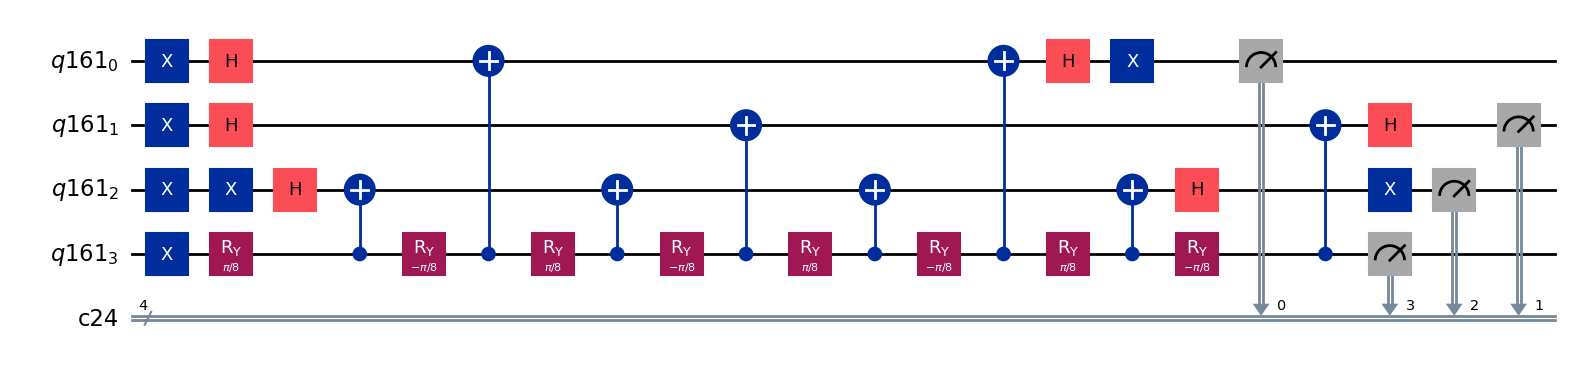

In [59]:
n_qubits = 4

q_reg = Q_R(n_qubits)
c_reg = C_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg,c_reg)

qc.x(1)
qc.x(2)
qc.x(3)

qc = ry_double_1(PI, 0,1,2,3, qc)
for i in range(n_qubits):
    qc.measure(i,i)

qc.draw('mpl')

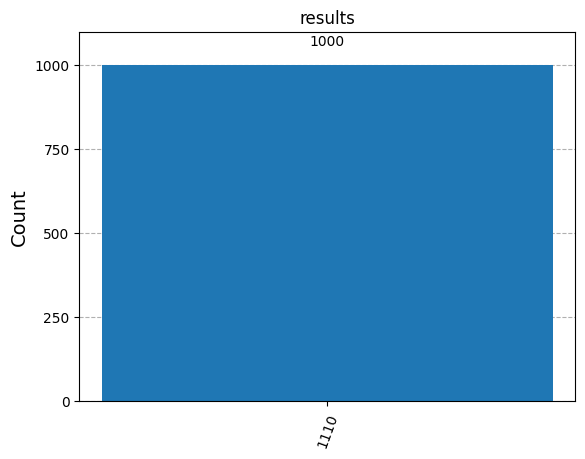

In [60]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = 1000).result()
counts= result.get_counts(qc_tr)


plot_histogram(counts, title = 'results')

## Single fermion exciattion circuit
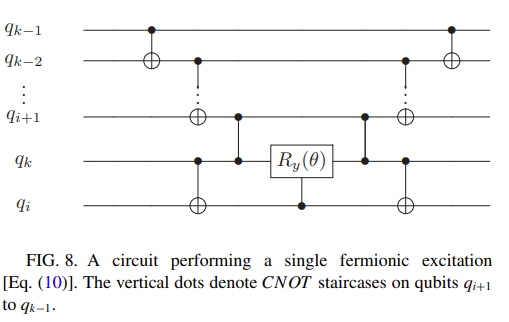

In [61]:
def se_yordanov(theta, i, k, qc):
    '''
    this is a function for single fermionic excitation

    Parameters:
    theta, float - rotation angle, defines how much of state i is transformed to k, full transition is when theta = pi
    i,k, int - states between which transoition happens
    qc, QuantumCircuit - quantum circuit to which the ry_c set of gates will be added
    '''
    if k - 1 > i + 1: 
        for i_q in range(k - 1, i + 1, -1):
            qc.cx(i_q, i_q - 1)
    qc.cx(k, i)
    if  k - 1 > i + 1: 
        qc.cz(i + 1, k)
    ry_c(theta, i, k, qc)
    if k - 1 > i + 1: 
        qc.cz(i + 1, k)
    qc.cx(k, i)
    if k - 1 > i + 1: 
        for i_q in range(i + 1, k - 1):
            qc.cx(i_q + 1, i_q)
    
    return qc

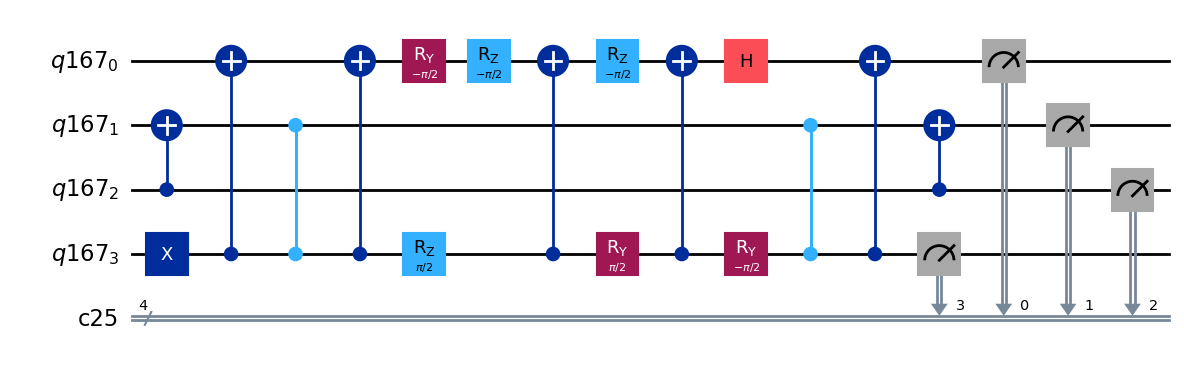

In [62]:
n_qubits = 4

q_reg = Q_R(n_qubits)
c_reg = C_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg,c_reg)

qc.x(3)

qc = se_yordanov(PI, 0, 3, qc)
for i in range(n_qubits):
    qc.measure(i,i)

qc.draw('mpl')

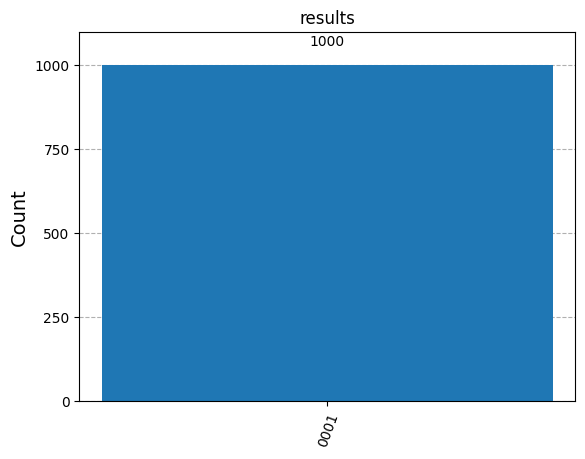

In [63]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = 1000).result()
counts= result.get_counts(qc_tr)


plot_histogram(counts, title = 'results')

## Double fermionic excitation

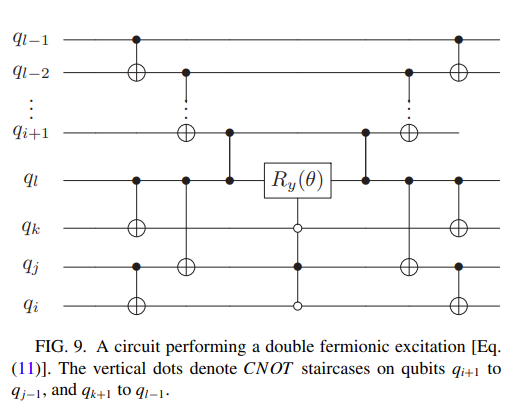

In [78]:
def de_yordanov(theta, i, j, k, l, qc):
    '''
    this is a function for double fermionic excitation

    Parameters:
    theta, float - rotation angle, defines how much of state i,j is transformed to k,l. Full transition is when theta = pi
    i,j,k,l, int - states between which transoition happens
    qc, QuantumCircuit - quantum circuit to which the ry_c set of gates will be added
    '''
    #theta = 8 * theta
    qc.cx(l, k)
    qc.cx(j, i)
    if l - 1 > i + 1: 
        for i_q in range(l - 1, i + 1, -1):
            qc.cx(i_q, i_q - 1)
    qc.cx(l, j)
    qc.cz(i + 1, l)
    
    ry_double_1(theta, i, j, k, l, qc)
    qc.cz(i + 1, l)
    qc.cx(l, j)
    if l - 1 > i + 1: 
        for i_q in range(i + 1, l - 1):
            qc.cx(i_q + 1, i_q)
    qc.cx(l, k)
    qc.cx(j, i)
    
    return qc

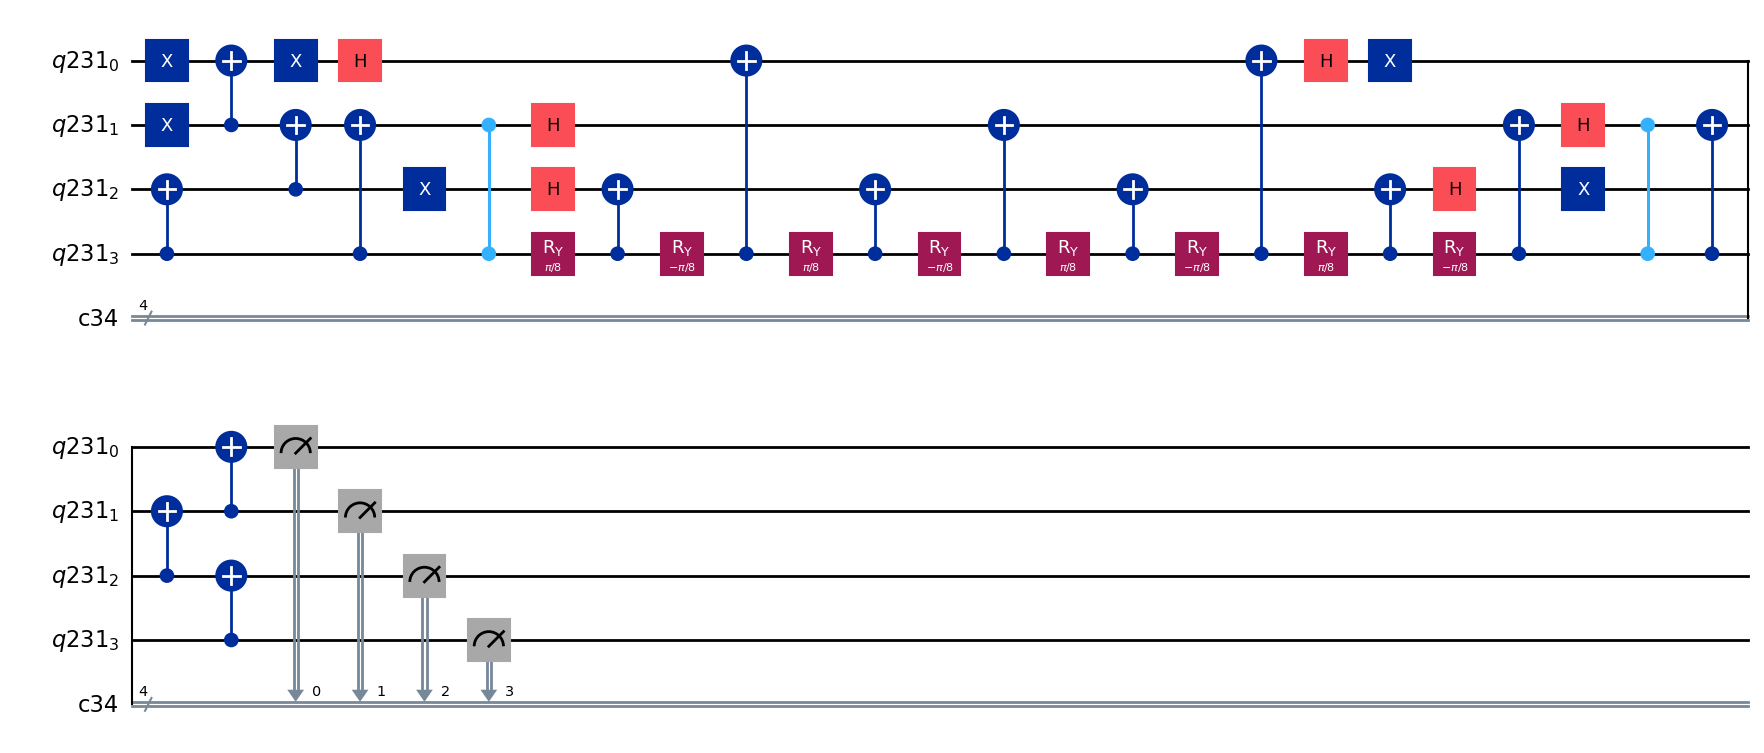

In [82]:
n_qubits = 4

q_reg = Q_R(n_qubits)
c_reg = C_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg,c_reg)

qc.x(0)
qc.x(1)
#qc.x(2)


qc = de_yordanov(PI, 0, 1, 2, 3, qc)
for i in range(n_qubits):
    qc.measure(i,i)

qc.draw('mpl')

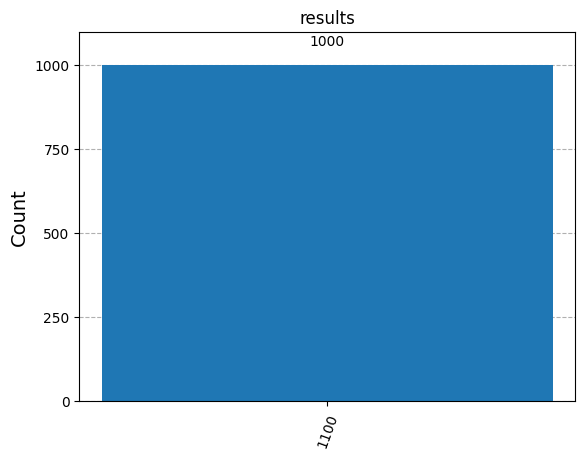

In [83]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = 1000).result()
counts= result.get_counts(qc_tr)


plot_histogram(counts, title = 'results')

## Full excitation opertor

In [57]:
def exc_yordanov(n_qubits, theta, qc):
    '''
    The function creates an operator that perform single-particle and double-particles transitions on an initial state.
    Initial state should be defined outside of the function.
    The function is independent of the initial state.

    Parameters:
    n_qubits - number of qubits in the cirquit qc. Should be more than 4. Corresponds to the number of states in the system.
    theta - array of angles theta, 0<theta<pi 
    
    '''
    n = 0
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            qc = se_yordanov(theta[n], i, j, qc)
            n = n + 1
    
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            for k in range(i + 1, n_qubits):
                for l in range(k + 1, n_qubits):
                    if k != j and l !=j:
                        qc = de_yordanov(theta[n], i, j, k, l, qc)
                        n = n + 1
    return qc

In [62]:
n_qubits = 8

len_se = n_qubits * (n_qubits - 1) / 2
len_de = n_qubits * (n_qubits - 1) * (n_qubits - 2) * (n_qubits - 3) / 4 / 2
len_tot = int(len_se + len_de)

print(len_se)
print(len_de)

theta = [0]
for i in range(len_tot):
    theta.append(0)

theta[8] = PI / 2

q_reg = Q_R(n_qubits)
c_reg = C_R(n_qubits)
qc = qiskit.QuantumCircuit(q_reg,c_reg)

qc.x(1)
qc.x(2)


qc = exc_yordanov(n_qubits, theta, qc)

for i in range(n_qubits):
    qc.measure(i,i)

#qc.draw('mpl')

28.0
210.0


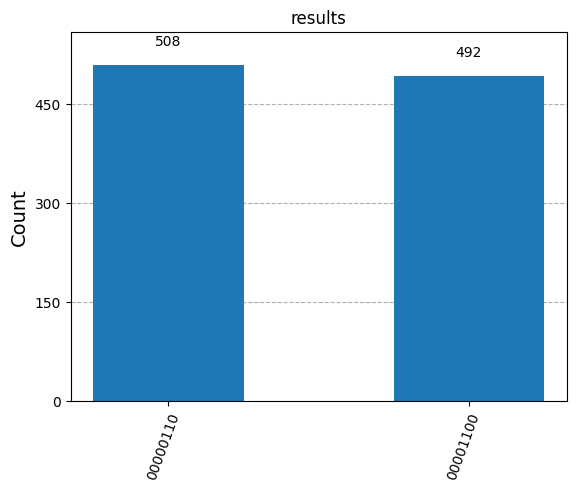

In [63]:
simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = 1000).result()
counts= result.get_counts(qc_tr)


plot_histogram(counts, title = 'results')